<a href="https://colab.research.google.com/github/white22ne/ProyectoDS_Partel-Blanco.ipynb/blob/main/ProyectoDS_Partel%2BGBlanco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este proyecto se realiza un análisis exploratorio completo de un conjunto de datos que contiene información sobre distintos vehículos, sus características principales y su precio de venta. El objetivo principal es comprender el comportamiento de las variables del dataset, evaluar la calidad general de la información disponible y analizar la posible relación entre determinadas características de los automóviles y su valor final en el mercado.

El proceso comienza con una exploración inicial del conjunto de datos, en la cual se revisa su estructura, los tipos de variables, la presencia de valores faltantes y los principales estadísticos descriptivos. Esta etapa permite obtener una primera visión del rango de precios, la distribución de los años de fabricación, los niveles de kilometraje y la frecuencia de las variables categóricas más relevantes, como la marca, el tipo de combustible y el estado del vehículo.

Posteriormente, se realizan análisis univariados mediante visualizaciones específicas para cada tipo de variable, con el objetivo de identificar patrones, concentraciones y posibles valores atípicos. A continuación, se desarrollan análisis bivariados que comparan el precio con variables clave como el año del vehículo, el kilometraje, la marca, la condición y el tipo de combustible, lo que permite evaluar la existencia de tendencias o relaciones visibles entre estas características y el valor del automóvil. Finalmente, se incorpora un análisis multivariado para observar la interacción conjunta de varias variables y determinar si su combinación aporta información adicional relevante.

Todo el análisis se encuentra alineado con las preguntas e hipótesis planteadas al inicio del proyecto, orientadas a evaluar si factores como la antigüedad, el uso, la marca y el tipo de combustible influyen en el precio de los vehículos. Los resultados obtenidos permiten validar o refutar dichas hipótesis y establecer conclusiones generales que sirven como base para futuras etapas de modelado predictivo.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/white22ne/ProyectoDS_Partel-Blanco.ipynb/refs/heads/main/car_price_prediction_.csv"
car_price = pd.read_csv(url)

car_price.head()


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


# **Car** **ID** : el identificador de cada auto.

# **Brand** : la marca.

# **Year** : año del vehículo.

# **Engine** **Size** : tamaño del motor.

# **Fuel** **Type** : tipo de combustible (nafta, diésel, eléctrico, etc.).

# **Transmission** : tipo de transmisión (manual o automática).

# **Mileage** : kilometraje del auto.

# **Condition** : estado del vehículo (nuevo, usado, como nuevo).

# **Price** : precio del auto.

# **Model** : modelo específico de la marca.

In [2]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [3]:
car_price.describe(include='all')

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
count,2500.00000,2500,2500.0000,2500.000000,2500,2500,2500.000000,2500,2500.000000,2500
unique,NaN,7,NaN,NaN,4,2,NaN,3,NaN,28
top,NaN,Toyota,NaN,NaN,Diesel,Manual,NaN,Used,NaN,Fiesta
freq,NaN,374,NaN,NaN,655,1308,NaN,855,NaN,103
mean,1250.50000,NaN,2011.6268,3.465240,NaN,NaN,149749.844800,NaN,52638.022532,NaN
std,721.83216,NaN,6.9917,1.432053,NaN,NaN,87919.952034,NaN,27295.833455,NaN
min,1.00000,NaN,2000.0000,1.000000,NaN,NaN,15.000000,NaN,5011.270000,NaN
25%,625.75000,NaN,2005.0000,2.200000,NaN,NaN,71831.500000,NaN,28908.485000,NaN
50%,1250.50000,NaN,2012.0000,3.400000,NaN,NaN,149085.000000,NaN,53485.240000,NaN
75%,1875.25000,NaN,2018.0000,4.700000,NaN,NaN,225990.500000,NaN,75838.532500,NaN


In [4]:
car_price.isnull().sum()

,0
Car ID,0
Brand,0
Year,0
Engine Size,0
Fuel Type,0
Transmission,0
Mileage,0
Condition,0
Price,0
Model,0


# Preguntas de investigacion

1 - El año del auto influye en el precio?

2 - El kilometraje afecta el valor del vehiculo?

3 - La marca o el estado del auto generan diferencias de precio?

# Hipotesis
H1 : Los autos mas nuevos deberian tener precios mas altos.

H2 : A mayor kilometraje, el precio deberia bajar.

H3 : La marca y la condicion del auto deberian marcar diferencias de precio.

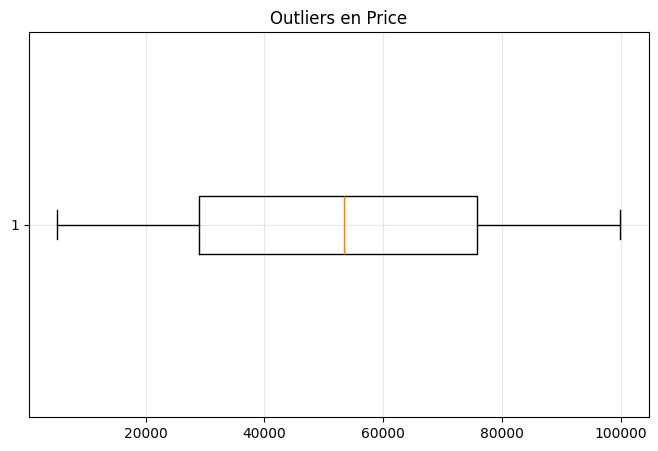

In [5]:
plt.figure(figsize=(8,5))
plt.boxplot(car_price['Price'], vert=False)
plt.title("Outliers en Price")
plt.grid(alpha=0.3)
plt.show()


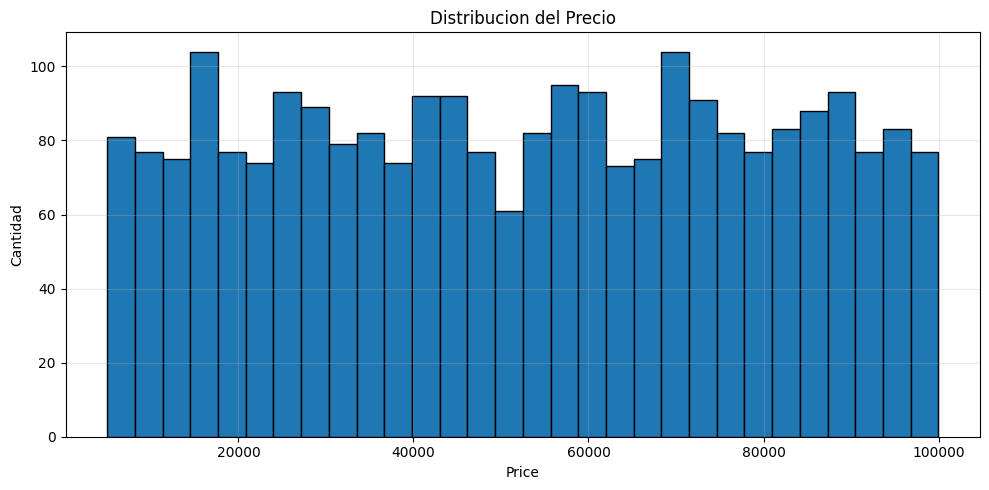

In [6]:
plt.figure(figsize=(10,5))
plt.hist(car_price['Price'], bins=30, edgecolor='black')
plt.title("Distribucion del Precio")
plt.xlabel("Price")
plt.ylabel("Cantidad")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


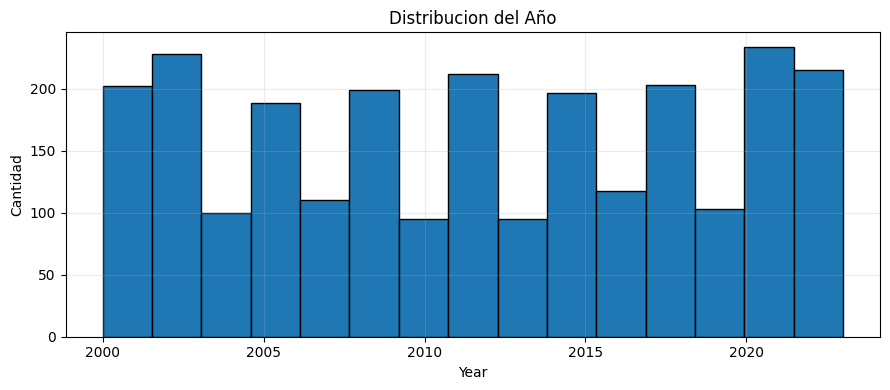

In [7]:
años = car_price['Year']
plt.figure(figsize=(9,4))
plt.hist(años, bins=15, edgecolor='black')
plt.title("Distribucion del Año")
plt.xlabel("Year")
plt.ylabel("Cantidad")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


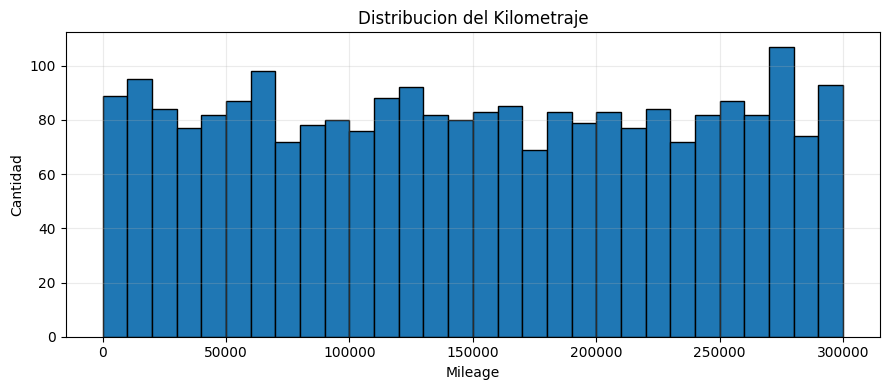

In [8]:
km = car_price['Mileage']
plt.figure(figsize=(9,4))
plt.hist(km, bins=30, edgecolor='black')
plt.title("Distribucion del Kilometraje")
plt.xlabel("Mileage")
plt.ylabel("Cantidad")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


# Interpretacion univariada:
# - El precio tiene mucha dispersion y outliers.
# - El año se concentra en autos relativamente nuevos.
# - El kilometraje es muy variado.
# - Ninguna variable tiene una distribucion limpia u homogénea.

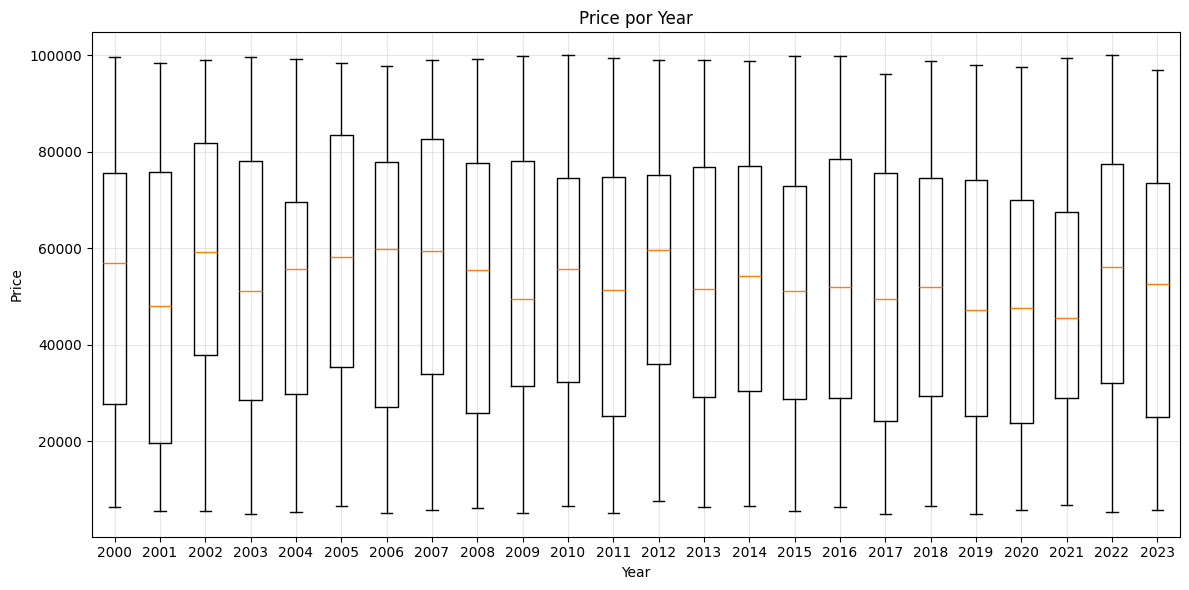

In [9]:
plt.figure(figsize=(12,6))

plt.boxplot(
    [car_price[car_price['Year'] == y]['Price'] for y in sorted(car_price['Year'].unique())],
    tick_labels = sorted(car_price['Year'].unique())
)

plt.title("Price por Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


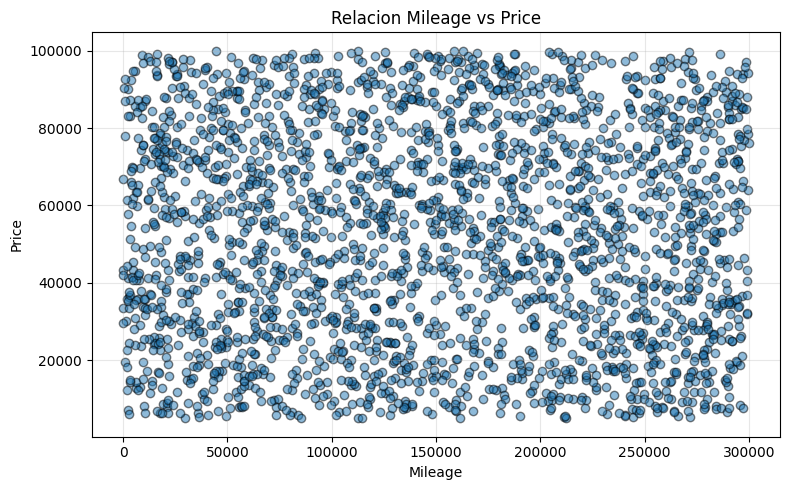

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(car_price['Mileage'], car_price['Price'], alpha=0.5, edgecolor='black')
plt.title("Relacion Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

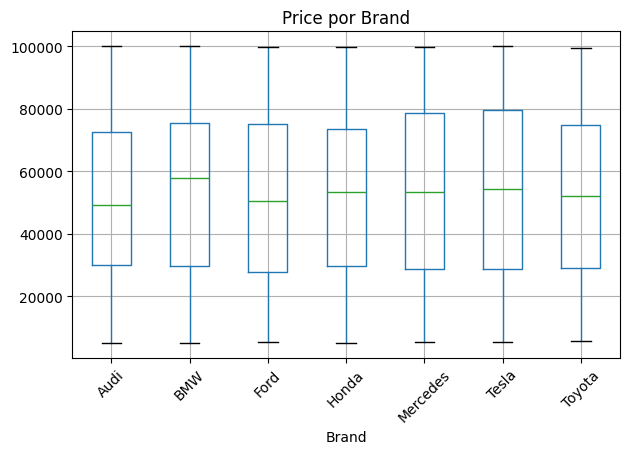

In [11]:
plt.figure(figsize=(10,5))
car_price.boxplot(column='Price', by='Brand', rot=45)
plt.title("Price por Brand")
plt.suptitle("")
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

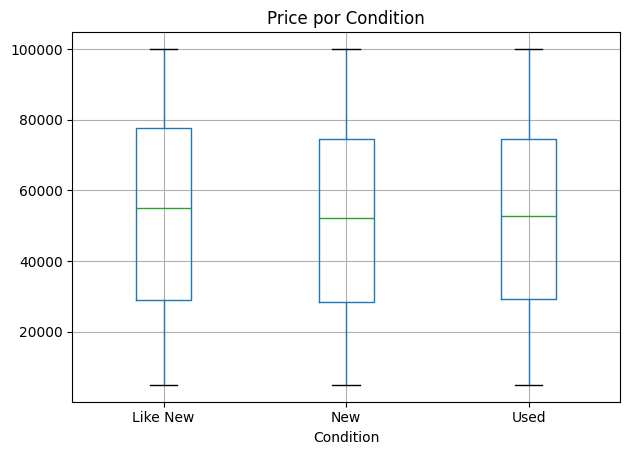

In [12]:
plt.figure(figsize=(8,5))
car_price.boxplot(column='Price', by='Condition')
plt.title("Price por Condition")
plt.suptitle("")
plt.tight_layout()
plt.show()


# Interpretacion bivariada:
# - No hay relacion fuerte entre Year y Price.
# - Mileage tampoco muestra una tendencia clara.
# - Algunas marcas tienen precios mas altos, pero no es determinante.
# - Condition marca diferencias, pero no muy fuertes.


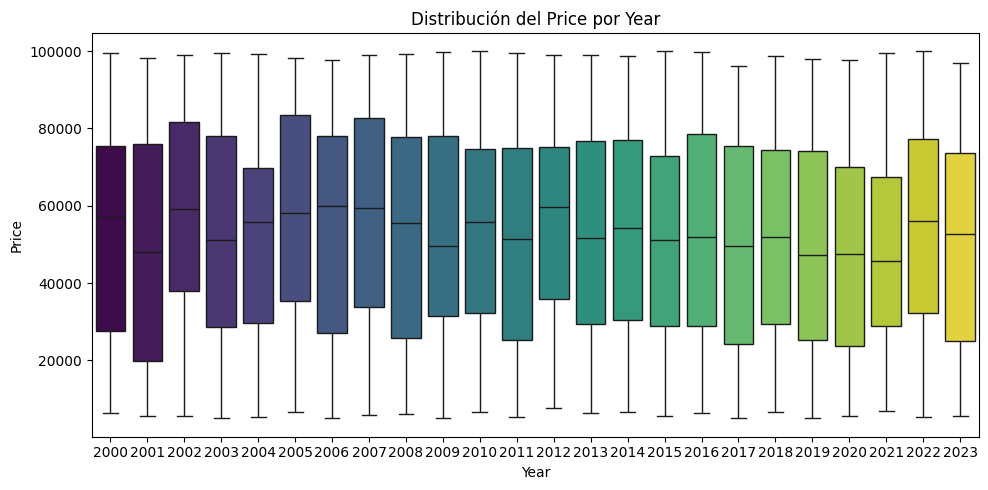

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=car_price,
    x='Year',
    y='Price',
    hue='Year',
    palette='viridis'
)
plt.legend([], [], frameon=False)
plt.title("Distribución del Price por Year")
plt.tight_layout()
plt.show()


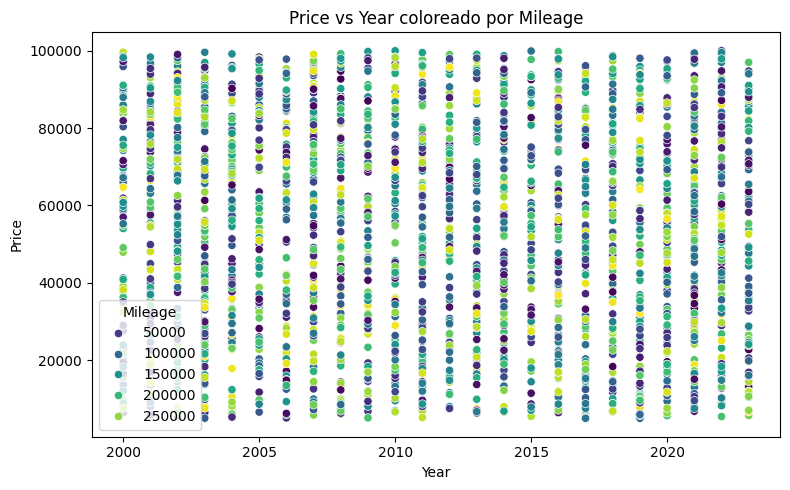

In [14]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=car_price, x='Year', y='Price', hue='Mileage', palette='viridis')
plt.title("Price vs Year coloreado por Mileage")
plt.tight_layout()
plt.show()


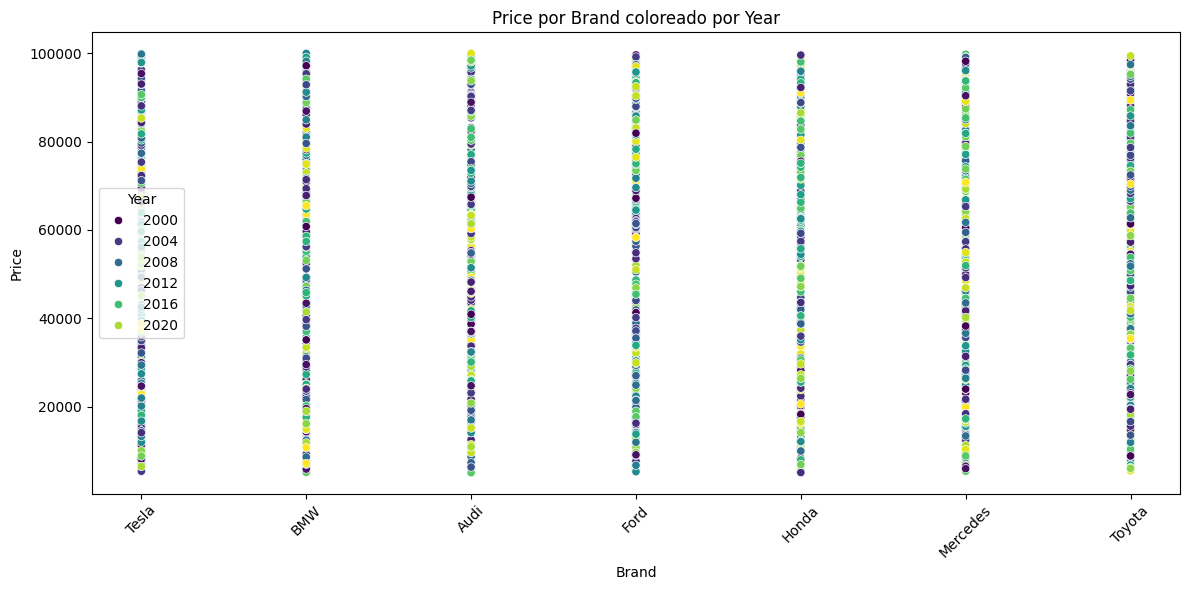

In [15]:

plt.figure(figsize=(12,6))
sns.scatterplot(data=car_price, x='Brand', y='Price', hue='Year', palette='viridis')
plt.title("Price por Brand coloreado por Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# **Interpretacion** **multivariada**:

# Las relaciones entre año, kilometraje, marca y precio estan muy dispersas.
# No hay grupos claros ni patrones fuertes.
# El precio no se explica bien con ninguna combinacion de variables.


In [16]:
corr = car_price.corr(numeric_only=True)
corr


,Car ID,Year,Engine Size,Mileage,Price
Car ID,1.000000,0.008050,0.000059,-0.035840,0.004650
Year,0.008050,1.000000,0.011833,0.002282,-0.036805
Engine Size,0.000059,0.011833,1.000000,-0.015782,-0.004420
Mileage,-0.035840,0.002282,-0.015782,1.000000,-0.008567
Price,0.004650,-0.036805,-0.004420,-0.008567,1.000000


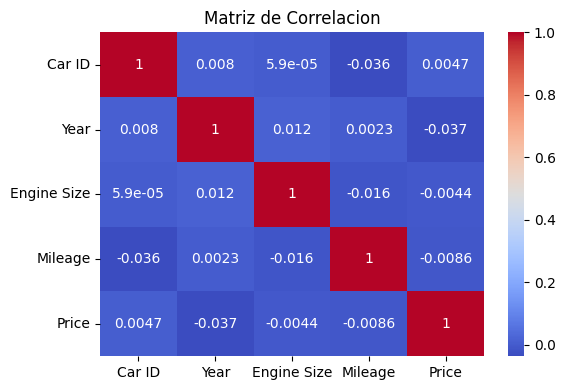

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlacion")
plt.tight_layout()
plt.show()



#              **Conclusiones** **finales** :

# - H1 : No hay relacion fuerte entre año y precio.
# - H2 : El kilometraje no explica el precio.
# - H3 : Marca y condicion influyen un poco.
----------------------------------------------------------
